In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')

In [22]:
temp.head(5)
temp=temp[:365]

In [23]:
temp['3DMA'] = temp['Temp'].rolling(window=3).mean()
temp['7DMA'] = temp['Temp'].rolling(window=7).mean()
temp['30DMA'] = temp['Temp'].rolling(window=30).mean()

In [24]:
temp.head()

,Date,Temp,3DMA,7DMA,30DMA
0,1981-01-01,20.7,NaN,NaN,NaN
1,1981-01-02,17.9,NaN,NaN,NaN
2,1981-01-03,18.8,19.133333,NaN,NaN
3,1981-01-04,14.6,17.100000,NaN,NaN
4,1981-01-05,15.8,16.400000,NaN,NaN


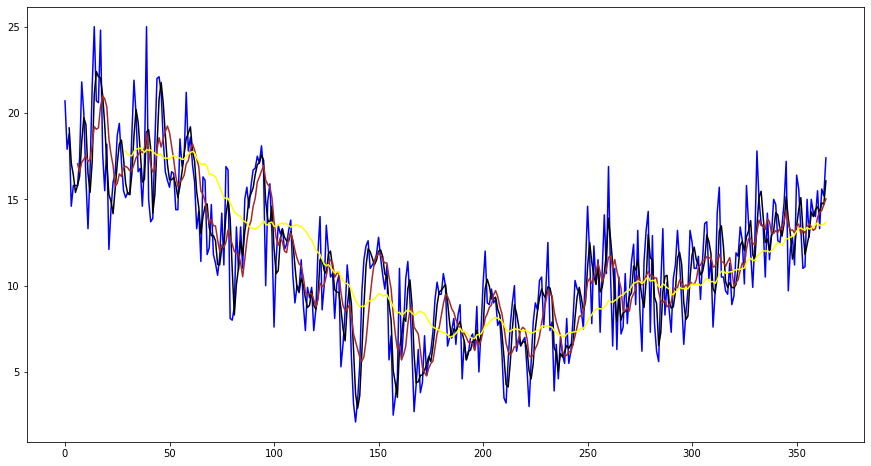

In [25]:
plt.figure(figsize=(15,8))
plt.plot(temp.Temp, color = 'b')
plt.plot(temp['3DMA'].dropna(),color='black')
plt.plot(temp['7DMA'].dropna(),color='brown')
plt.plot(temp['30DMA'].dropna(),color='yellow')
plt.show()

In [26]:
from statsmodels.tsa.arima_model import ARMA
X = temp.Temp
train = X[1:350]
test = X[350:]
model = ARMA(train,order=(0,3)).fit()


In [27]:
pred = model.predict(349,363)

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
error = mean_squared_error(test,pred)

In [31]:
error

11.49081147034255

In [32]:
model1 = ARMA(train,order=(2,3)).fit()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.